MSCI 446 

Final Project Report

Saif Abuosba, Theveenan Nirmalan
20896949, 20898397


## Introduction


Within this project, we use a dataset containing nutritional information about food to perform unsupervised machine learning and obtain insights regarding relationships and categorizations between over 7000 foods. We hope to obtain new insights about foods that may help inform future dietary decisions or create research questions that can be further analyzed within the scientific community. The dataset we plan to perform unsupervised learning on contains raw data on nutritional metrics of many different foods.

## Data Description


The dataset used in this project is available online and can be obtained in CSV format (link: https://corgis-edu.github.io/corgis/csv/food/) [1]. The specific data within this dataset was sourced from ‘United States Department of Agriculture’s Food Composition Database’. 

This dataset contains 7083 records and has 38 features; most of which provide nutritional information for different foods and beverages. These features contain both numerical and categorical data, although the categorical data are just unique identifiers for each record and so for our purposes, we will be removing those categorical features. Each of the numeric features represents the quantity of some nutritional element within 100 grams of the food which the record represents. 


#### Feature Description


Below is a list of names of each of the features, followed by their data type:

Category: Categorical - String 

Description: Categorical - String 

Nutrient Data Bank Number: Numerical - Integer

Data.Alpha Carotene: Numerical - Integer

Data.Beta Carotene: Numerical - Integer

Data.Beta Cryptoxanthin: Numerical - Integer

Data.Carbohydrate: Numerical - Float

Data.Cholesterol: Numerical - Integer

Data.Choline: Numerical - Float

Data.Fiber: Numerical - Float

Data.Lutein and Zeaxanthin: Numerical - Integer

Data.Lycopene: Numerical - Integer

Data.Niacin: Numerical - Float

Data.Protein: Numerical - Float

Data.Retinol: Numerical - Integer

Data.Riboflavin: Numerical - Float

Data.Selenium: Numerical - Float

Data.Sugar Total: Numerical - Float

Data.Thiamin: Numerical - Float

Data.Water: Numerical - Float

Data.Fat.Monosaturated Fat: Numerical - Float

Data.Fat.Polysaturated Fat: Numerical - Float

Data.Fat.Saturated Fat: Numerical - Float

Data.Fat.Total Lipid: Numerical - Float

Data.Major Minerals.Calcium: Numerical - Integer

Data.Major Minerals.Copper: Numerical - Float

Data.Major Minerals.Iron: Numerical - Float

Data.Major Minerals.Magnesium: Numerical - Integer

Data.Major Minerals.Phosphorus: Numerical - Integer

Data.Major Minerals.Potassium: Numerical - Integer

Data.Major Minerals.Sodium: Numerical - Integer

Data.Major Minerals.Zinc: Numerical - Float

Data.Vitamins.Vitamin A - RAE: Numerical - Integer

Data.Vitamins.Vitamin B12: Numerical - Float

Data.Vitamins.Vitamin B6: Numerical - Float

Data.Vitamins.Vitamin C: Numerical - Integer

Data.Vitamins.Vitamin E: Numerical - Float

Data.Vitamins.Vitamin K: Numerical - Float



#### Import Statements

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Import Dataset

Read data from local CSV file in current folder, and store it to 'food' dataframe

In [22]:
food = pd.read_csv('food.csv') 
food 


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,Sauce as ingredient in hamburgers,Sauce as ingredient in hamburgers,99998130,0,194,4,17.14,13,20.0,0.6,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


#### Feature Engineering

Omit data description columns:
Specifically, remove the columns 'Category', 'Description', and 'Nutrient Data Bank Number' because Description and Category are labels and Nutrient Data Bank Number is unique for every row. 

In [23]:
food = food[food.columns[3:]]
food

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0,7,0,6.89,14,16.0,0.0,0,0,0.177,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,0,4,0,4.87,8,17.9,0.0,0,0,0.110,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,0,7,0,4.46,14,16.0,0.0,0,0,0.043,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,103,464,0,5.48,0,7.4,1.6,142,2597,0.637,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,1,11,0,4.81,0,19.4,1.4,18,0,3.678,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,368,994,0,11.60,0,14.6,2.2,225,458,0.773,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,0,194,4,17.14,13,20.0,0.6,112,7237,0.917,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


#### Data Transformation

Now we standardize our data using 'StandardScaler' in order to reduce the range between values from different features (since some features have very high values and others have very low values). This will bring the numeric values of our different features closer together which will help with our PCA operations in the next section.

In [24]:
#Define the scaler object
scaler = StandardScaler()
#Use the scaler object to normalize the dataset
food_scaled = scaler.fit_transform(food)

#### Data Cleaning

Upon analyzing our data, we did not see any requirements for data cleaning, since all rows have some permitted value (non-negative numeric) for every feature.

In the below code, we obtain the amount of '0' values within each column. 

In [25]:
countZeroes = (food == 0).sum()
countZeroes

Data.Alpha Carotene               5180
Data.Beta Carotene                2283
Data.Beta Cryptoxanthin           5011
Data.Carbohydrate                  430
Data.Cholesterol                  2443
Data.Choline                       190
Data.Fiber                        1642
Data.Lutein and Zeaxanthin        2235
Data.Lycopene                     6033
Data.Niacin                        165
Data.Protein                       202
Data.Retinol                      2650
Data.Riboflavin                    169
Data.Selenium                      253
Data.Sugar Total                   663
Data.Thiamin                       217
Data.Water                          18
Data.Fat.Monosaturated Fat         336
Data.Fat.Polysaturated Fat         300
Data.Fat.Saturated Fat             322
Data.Fat.Total Lipid               228
Data.Major Minerals.Calcium        137
Data.Major Minerals.Copper         116
Data.Major Minerals.Iron           168
Data.Major Minerals.Magnesium      121
Data.Major Minerals.Phosp

Let's look at all features which have more than 50% of the rows (3542 rows) as a value of '0'. The only three features with more than 3542 rows containing a '0' value are 'Alpha Carotene', 'Beta Cryptoxanthin', and 'Lycopene'. 

According to National Library of Medicine [2] red fruits and vegetables are very high in lycopene. Thus we should keep this feature in our dataset because it may help our K-means algorithm cluster red fruits and vegetables better.

According to Louis Bonduelle Foundation [3] many vegetables are high in alpha-carotene. So we should also keep this feature in our dataset because can help cluster our data to look for vegetables better.

According to National Library of Medicine [4] orange foods like oranges, tangerines, and persimmons contain beta-cryptoxantin. Therefore we should keep this feature in our dataset as it may help with clustering for these orange foods.

#### Exploratory Data Analysis 

Based on the dimensions of the food dataset we see that it contains 7083 rows/entries each of which has 35 features. 

In [26]:
food.shape

(7083, 35)

Below is a heatmap for all non-omitted features in our dataset, where intensities are given for each pair of features based on their correlation. On the heatmap, we can see apart from the diagonal (which is comparing features with themselves) there are a few moderate to highly correlated features both positively and negatively correlated such as Water and Carbohydrate.

Heatmaps are useful for preliminary analysis because it gives a compact visual representation of relationships between features which can help us get a better idea of what to expect as we work with our data.

(Note: The font size is small due to the large amount of features required for comparison in map)

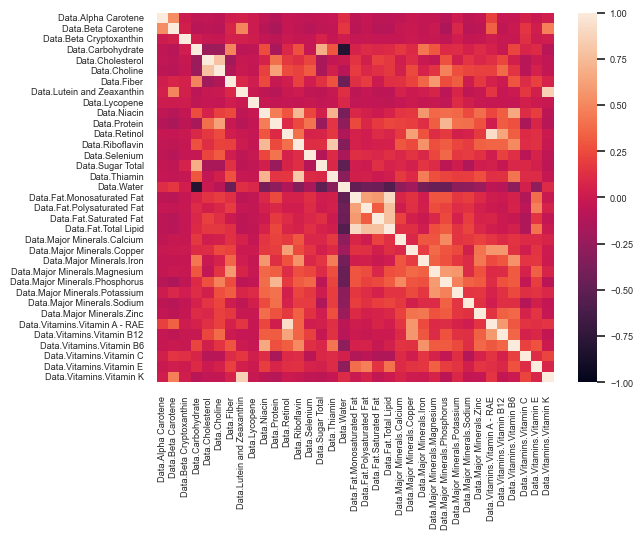

In [27]:
sns.set(font_scale=0.6)
heatMap = sns.heatmap(food.corr(), vmin=-1, vmax=1) # Create a heatmap with correlation values between -1 and 1 


We define a moderate to high correlation to have values between 0.75 and 1, we omit anything with value 1 to avoid outputting the diagonal values of the heat map (which are features being compared to themselves).

In [28]:
food_temp = food.corr()

s = set()
for index, row in food_temp.iterrows():
    for i, x in enumerate(row):
        if abs(x) >= 0.75 and abs(x)!=1:
            s.add(tuple(sorted([food.columns[0:][i], index, str(round(x, 2))])))

for x in s:
    print(x)


('0.85', 'Data.Lutein and Zeaxanthin', 'Data.Vitamins.Vitamin K')
('0.79', 'Data.Cholesterol', 'Data.Choline')
('-0.81', 'Data.Carbohydrate', 'Data.Water')
('0.82', 'Data.Riboflavin', 'Data.Thiamin')
('0.77', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Total Lipid')
('0.9', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Total Lipid')
('0.93', 'Data.Retinol', 'Data.Vitamins.Vitamin A - RAE')
('0.78', 'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid')


From above, we can see 8 pairs of features which have a high correlation (with absolute values between 0.75 and 1)

## Machine Learning

#### PCA

To start, we'll determine the optimal number of dimensions that PCA will reduce our dataset to using a variance curve. We aim to maintain 99% of the variance. Reducing the number of dimensions will reduce the runtime when it comes time to use K-Means clustering. 

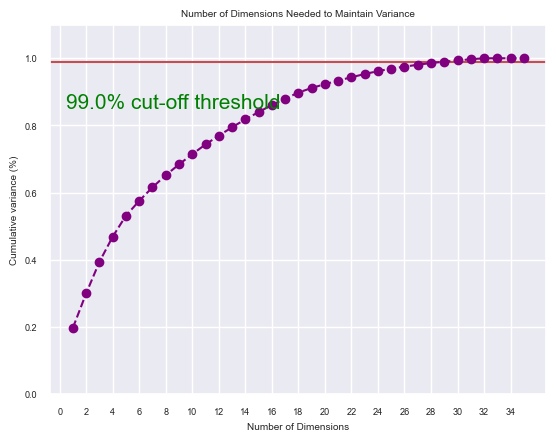

In [29]:
#Fitting PCA onto our food_scaled dataframe and computing variance ratios
pca = PCA().fit(food_scaled)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)

#Defining the axes
xi = np.arange(1, len(variance_ratio)+1, step=1)
y = np.cumsum(variance_ratio)

#Defining the Plot
plt.xticks(np.arange(0, 36, step=2)) 
plt.ylim(0.0,1.1)
plt.axhline(y = 0.99, color='r', linestyle='-')
plt.plot(xi, y, marker='o', linestyle='--', color='purple')
plt.text(0.5, 0.85, f'{100*0.99}% cut-off threshold', color = 'green', fontsize=15)
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Dimensions Needed to Maintain Variance')

#Displaying the plot
plt.show()

Based on the variance curve above, in order to maintain 99% of the variance, we must reduce our dataset to a minimum of 29 dimensions. this indicates that there is low linear correlation between features and that we won't save much runtime for K-Means using PCA since we only omit 6 dimensions. Nevertheless, we now apply PCA reducing our dataset to 29.

In [30]:
#Define PCA object for scaling down to 29 dimensions
pca = PCA(n_components=29)
#Fit food_scaled dataframe to 29 dimensions using the PCA object
food_pca_29 = pca.fit_transform(food_scaled)

#View new dataframe's dimensions to confirm only 29 columns
food_pca_29.shape

(7083, 29)

#### K-Means

We will now determine the optimal K or optimal number of clusters based on our 29 dimension dataset and our original 35 dimension dataset using the 'Kneed' library. 

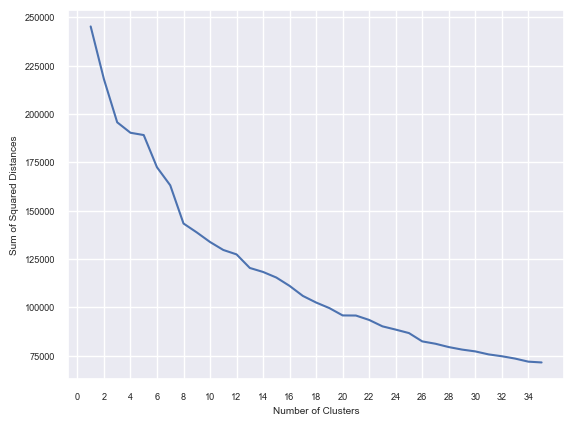

The knee point for the 29 dimension dataset is at k=13


In [31]:
# Calculate the sum of squared distances from each point to its closest mean for different values of k
sumDist = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(food_pca_29)
    sumDist.append(kmeans.inertia_)

# Use the KneeLocator class to find the knee point
knee = KneeLocator(range(1, 36), sumDist, curve='convex', direction='decreasing')

# Get the value of k at the knee point
k = knee.knee

plt.plot(range(1, 36), sumDist)
plt.xticks(np.arange(0, 36, step=2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

print("The knee point for the 29 dimension dataset is at k=" + str(k))

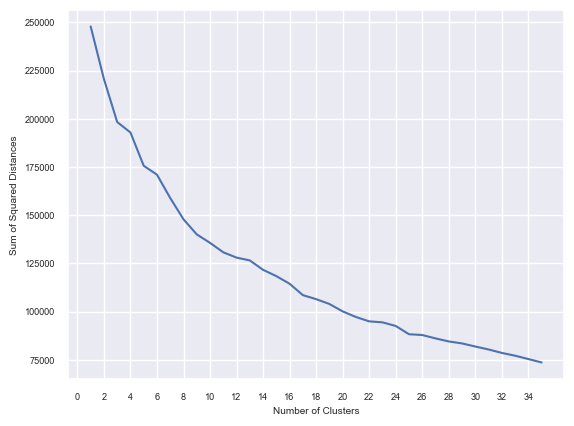

The knee point for the 35 dimension dataset is at k=9


In [32]:
# Calculate the sum of squared distances from each point to its closest mean for different values of k
sumDist = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(food_scaled)
    sumDist.append(kmeans.inertia_)

# Use the KneeLocator class to find the knee point
knee = KneeLocator(range(1, 36), sumDist, curve='convex', direction='decreasing')

# Get the value of k at the knee point
k = knee.knee

plt.plot(range(1, 36), sumDist)
plt.xticks(np.arange(0, 36, step=2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

print("The knee point for the 35 dimension dataset is at k=" + str(k))

From the above outputs, we can see that the optimal number of clusters for our PCA reduced dataset is actually more than for our 35-dimsnion dataset.
From this we can interpret that our reduced dataset has actually lost significant clustering power because we went from being able to cluster our dataset with 9 means to 13 means. 
We believe this lower value of 9 means is better because it tells us that the 35-dimension dataset needs fewer means to capture the variance within our data.


Thus, going foward we will use the unreduced 35-dimension dataset instead of the reduced 29-dimension dataset.

For our first iteration of using K-Means clustering, we will use the optimal number of clusters (9) on the 35-dimension dataset (without PCA dimensionality reduction).

In [33]:
# Perform KMeans clustering with k=9
# fit the model to the feature data
nine_means = KMeans(n_clusters=9, random_state=0).fit(food_scaled)
food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=nine_means.labels_


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now we plot the clustering results. For this, we will use a parallel coordinate plot. Each of the different colours on the plot represents a different cluster and each line is a different datapoint. We can see on the plot where datapoints for each cluster (lines of each colour) cross each feature to see generally how high/low the values are for datapoints within each cluster for different features.

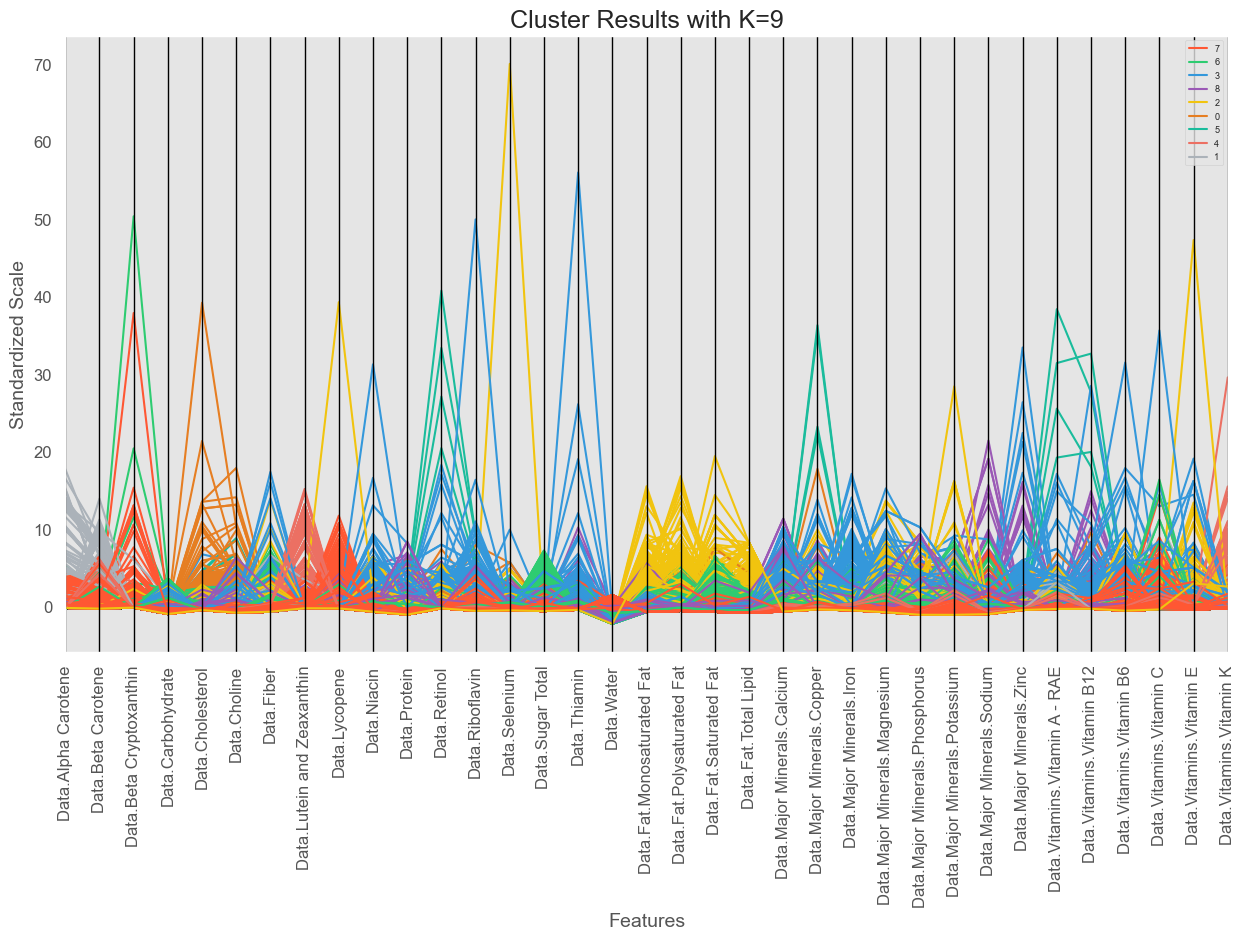

In [34]:


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.title("Cluster Results with K=9", fontsize=18)
    plt.xticks(rotation=90)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Standardized Scale", fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=['#FF5733', '#2ECC71', '#3498DB', '#9B59B6','#F1C40F','#E67E22','#1ABC9C','#EC7063','#ABB2B9'])


In [35]:
for x in range (9):
    tempDF=(food_scaled.loc[food_scaled['cluster']==x])
    a=tempDF[tempDF.columns[0]].count()
    print('Cluster',x,'has',a,'rows')

Cluster 0 has 139 rows
Cluster 1 has 74 rows
Cluster 2 has 190 rows
Cluster 3 has 172 rows
Cluster 4 has 88 rows
Cluster 5 has 4 rows
Cluster 6 has 1142 rows
Cluster 7 has 3390 rows
Cluster 8 has 1884 rows


NOTE: Due to the fact that every time code is re-run on this file, a new color and number is assigned to each cluster - the outputted graph and cluster numbers displayed above may not be the same ones we used during our analysis. To workaround this discrepancy, the graph and clusters we used are attached below. Please refer to these 2 screenshots below when reading the following text. Also note, that the actual clusters are near identical, it is only the colors and numbers assigned to each cluster that are different, and so the underlying results will be the same.

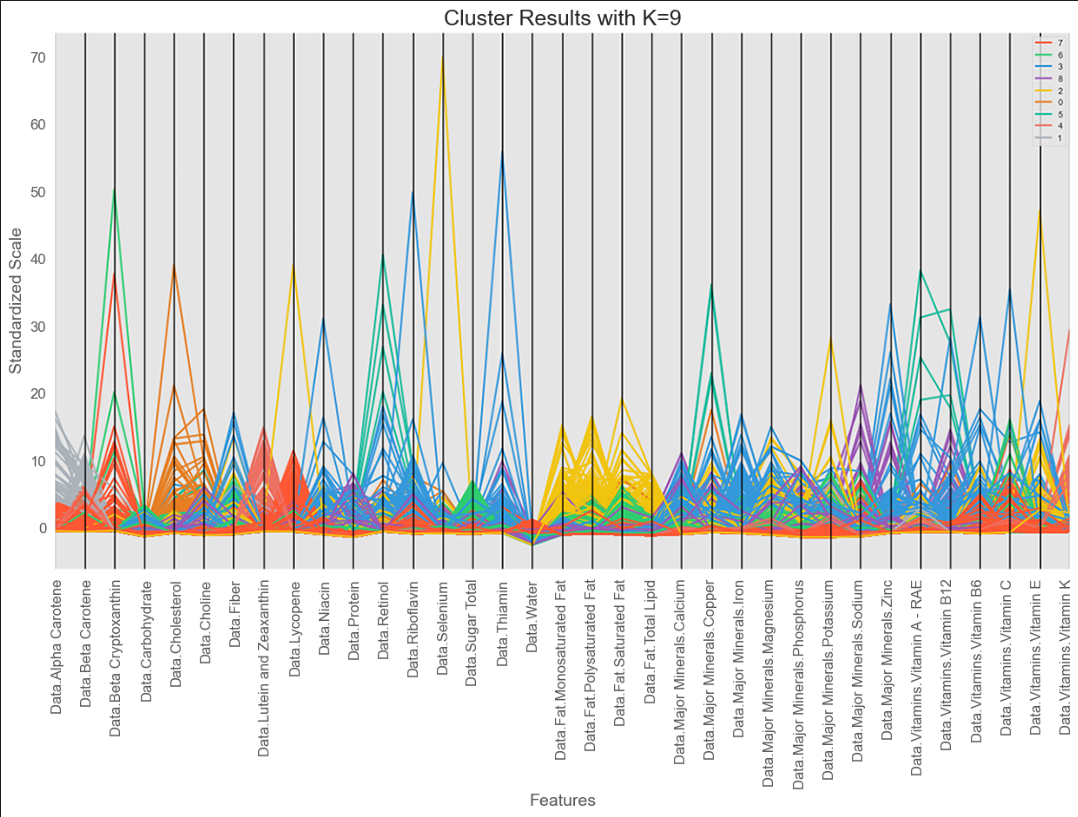


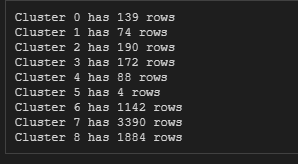

Looking at our above graph, we see that each of the different clusters is represented by a different color. We can look at which colors dominate different features to help us understand what our different outputted clusters represent. Below is our insights for each of the 9 clusters:

Cluster #0 (Orange) - High Cholesterol. According to Cleveland Clinic [5], high cholesterol foods could entail many foods like eggs, processed meat, and butter. This cluster could represent foods that are usually okay in moderate amounts but can quickly become unhealthy in large amounts.

Cluster #1 (Grey) - High Alpha Carotene, High Beta Carotene. According to Mount Sinai Health System [6], many vegetables contain high amounts of carotene. So we could expect this cluster to represent vegetables.

Cluster #2 (Yellow) - Very High Monosaturated Fats, Very High Polysaturated Fats, Very High Saturated Fat, High Vitamin E, Medium Magnesium, Medium Copper. According to MedlinePlus [7] foods with these attributes could entail fatty foods like avocado, nuts, and fatty fish. These foods are foods with many healthy fats, and are sometimes called "super foods". 

Cluster #3 (Blue) - High in Iron, High in Thiamin, High in Fiber, High in Niacin, High in Riboflavin, Hign in Calcium, High in Zinc, High in Magnesium. According to Healthline [8], foods high in these attributes could entail red meat, legumes, liver and other organs. Many of these foods are high in protein.

Cluster #4 (Peach) - High Lutein and Zeaxanthin. According to National Library of Medicine [9], foods high in these attributes could entail fruits and vegetables with a yellow or orange color (like corn, carrots, or cantaloupe).

Cluster #5 (Turqoise) - High in Retinol, High in Copper, High in Vitamin A. According to NHS [10], foods in this group could entail cheese, eggs, milk, and yogurt. This group is likely clustered by foods that have high protein and dairy. Note, there are only 4 items in this cluster as displayed above. From our graph, we can see how cluster 5 items (turqoise lines) have spikes very far from all other datapoints. This tells us that these 4 foods are very unlike the rest of the dataset in regards to certain features, which justifies them being part of their own cluster.

Cluster #6 (Green) - High Sugar, High Saturated Fats, Medium Polysaturated Fats. According to Tameside Metropolitan Borough Council [11], foods in this group could entail chocolate, icecream, biscuits, and cake.

Cluster #7 (Muted Red) - High Water, High Lycopene, High Beta Cryptoxaanthin, Low in Potassium. According to MyFoodData [12], foods in this group could entail foods like red cabbage, tomato, watermelon, and grapefruit. This cluster could be composed of foods that are primarily red in colour.

Cluster # 8 (Purple) - High Sodium, Relatively High Vitamin B12, Relatively High Protein, Relatively High Calcium, Low Amounts of Water. This cluster has a very wide spread of different types of foods, and so it is hard to say whether there is really any real relations between these foods, or whether they were just clustered together because they were really far from all other data clusters.

Analyzing these clusters, with the exception of cluster 8 it is evident that all the clusters grouped together foods that have a/some similar attributes (ex. similar colors, or foods with similar healthy fats). Although when analyzing all clusters as a whole, we can't say that each cluster represents some specific category/domain of foods that is specific to only it's cluster and not applicable to other clusters. In other words, we see that there are attributes of certain clusters that could apply to other clusters as well. Also, we see that certain clusters provide very helpful insights such as cluster 2 which represents healthy fat foods, whereas other clusters may not give many helpful insights such as cluster 7 which represents red colored foods. 



We now run K-Means with k=2 on the unreduced 35 dimensions dataset with a hypothesis it will cluster based on healthy and unhealthy foods. 

In [36]:
# Perform KMeans clustering with k=2
# fit the model to the feature data
two_means = KMeans(n_clusters=2, random_state=0).fit(food_scaled)

food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=two_means.labels_


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now we plot the clustering results using a parallel coordinate plot.

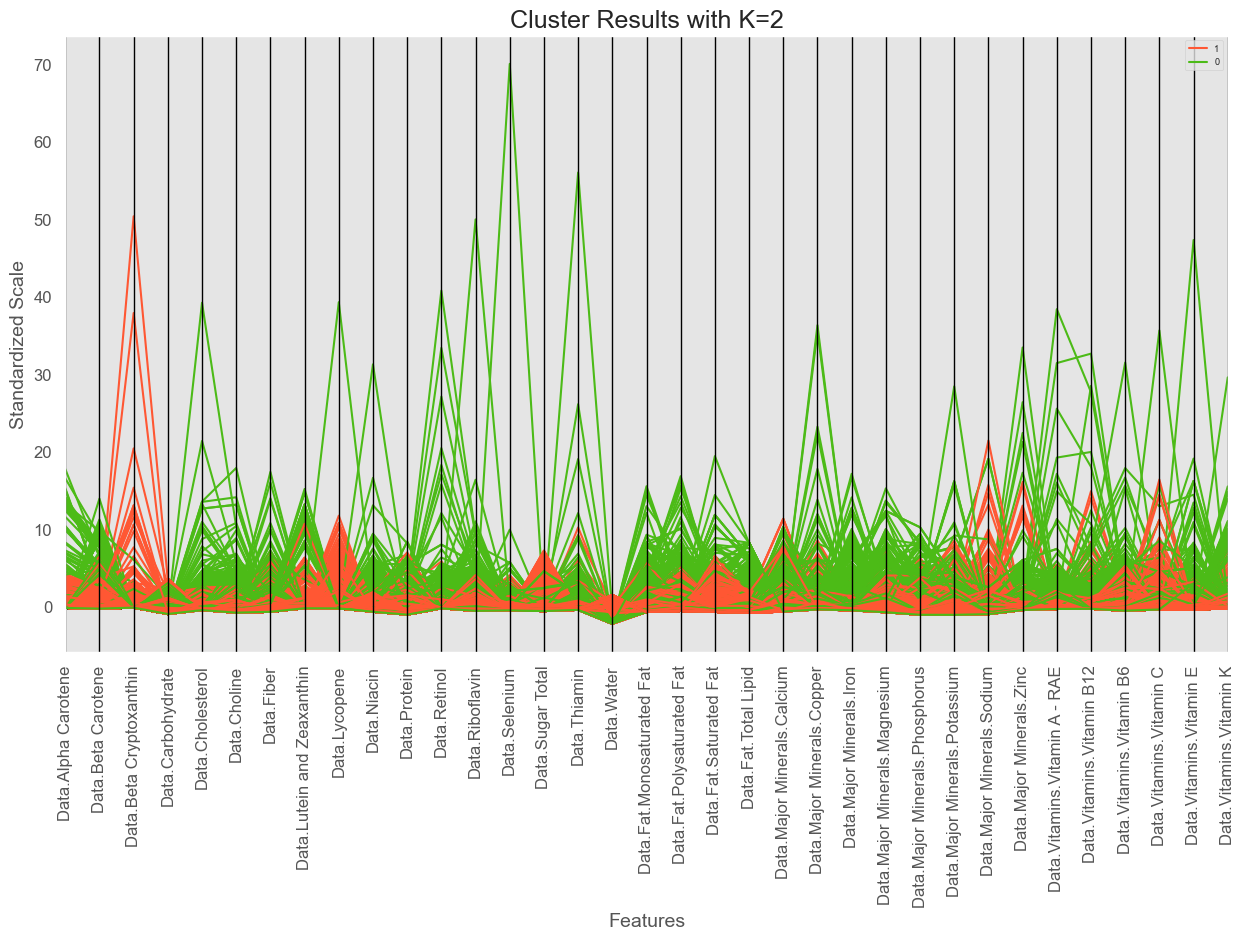

In [37]:

with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.title("Cluster Results with K=2", fontsize=18)
    plt.xticks(rotation=90)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Standardized Scale", fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=['#FF5733', '#4CBB17'])

In [38]:
for x in range (2):
    tempDF=(food_scaled.loc[food_scaled['cluster']==x])
    a=tempDF[tempDF.columns[0]].count()
    print('Cluster',x,'has',a,'rows')

Cluster 0 has 667 rows
Cluster 1 has 6416 rows


NOTE: Due to the fact that every time code is re-run on this file, a new color and number is assigned to each cluster - the outputted graph and cluster numbers displayed above may not be the same ones we used during our analysis. To workaround this discrepancy, the graph and clusters we used are attached below. Please refer to these 2 screenshots below when reading the following text. Also note, that the actual clusters are near identical, it is only the colors and numbers assigned to each cluster that are different, and so the underlying results will be the same.

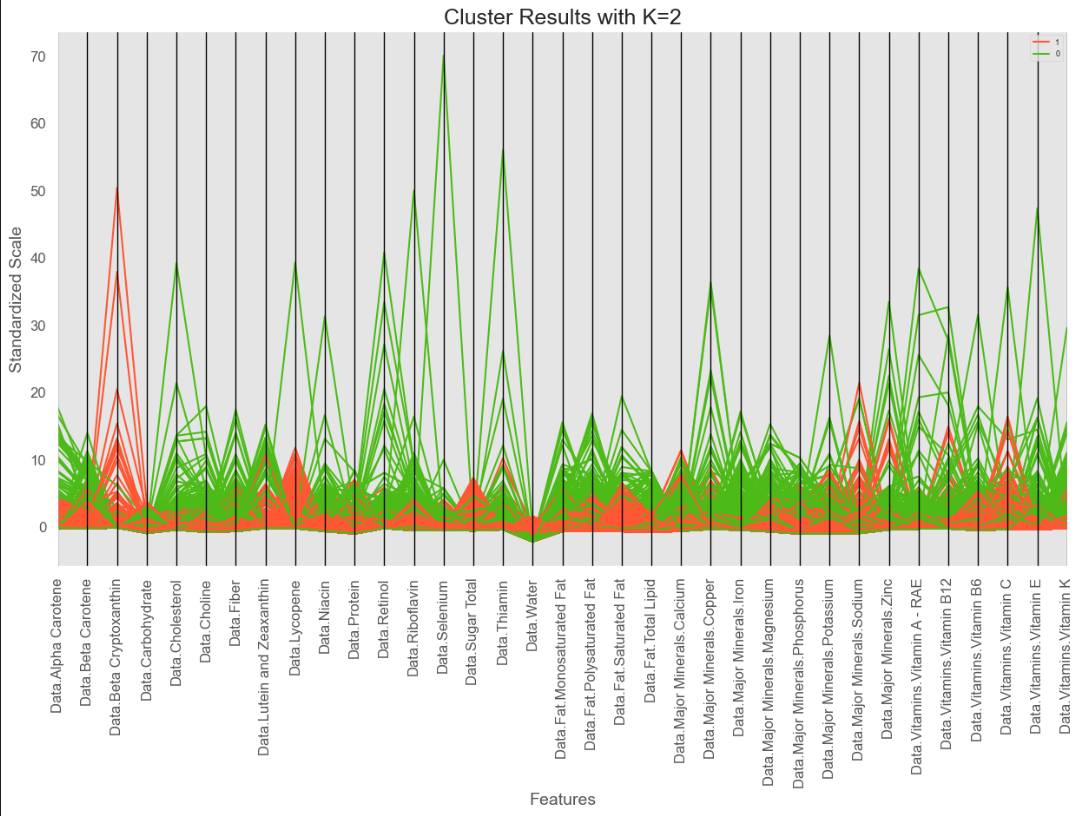

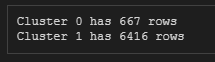

Looking at our above graph, we can see the 2 different clusters determined by our K-means algorithm and how their values are distributed across different features.

Looking at cluster 0 (Green): We start by noticing that cluster 0 only accounts for about 10% of our dataset, so these these foods are much fewer in quantity compared to the foods in the next cluster. We see these foods are higher than cluster 1 in nearly every feature, except Water, cryptoxanthin, lycopene, sugar, sodium, and vitamin C. 

Looking at cluster 1 (Orange): This cluster accounts for 90% of our dataset and it high in all the features not mentioned in the previous cluster. 

After analyzing our results, we suspected that outliers/far datapoints were clustered into cluster 0. We suspect this due to the large spikes in values for cluster 0 datapoints on the graph, and also due to the fact that the clusters were split into groups containing 10% and 90% of the data which is not very symmetrical. Additionally, we see that the spread between many feature values within cluster 0 is large, so we can gather that foods in cluster 0 aren't very similar to each other, but rather they are all very unsimilar to foods in cluster 1. Overall this clustering, provided us with very little beneficial insights since we originally expected to have clusters representing healthy and unhealthy foods.

We now run K-Means with k=4 on the full 35 dimensions dataset with a hypothesis that it will cluster based on the 4 major food groups (Fruits & Vegetables, Grains, Protein Foods, and Dairy)

In [39]:
# Perform KMeans clustering with k=4
# fit the model to the feature data
four_means = KMeans(n_clusters=4, random_state=0).fit(food_scaled)

food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=four_means.labels_


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now we plot the clustering results using a parallel coordinate plot.

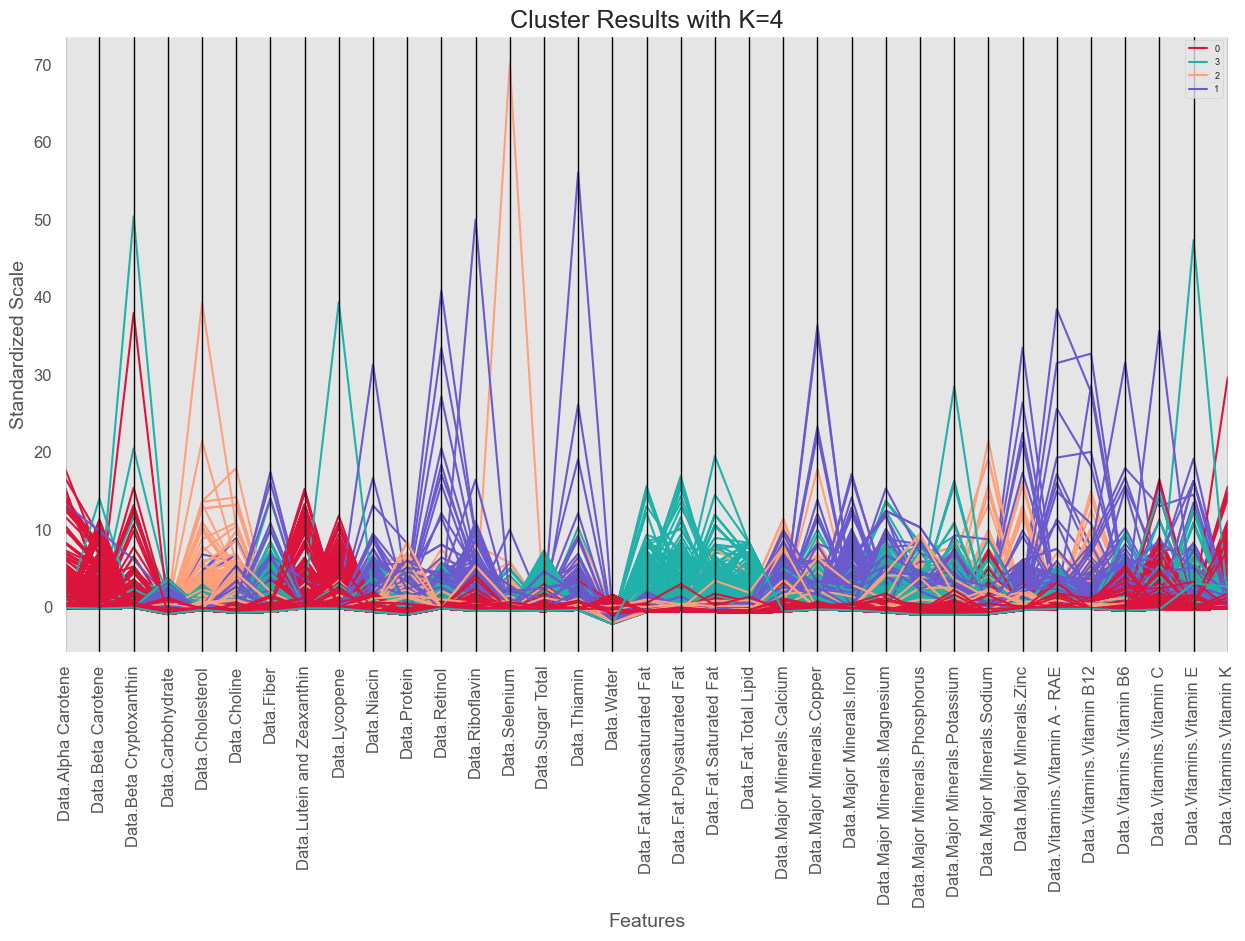

In [40]:

with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.title("Cluster Results with K=4", fontsize=18)
    plt.xticks(rotation=90)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Standardized Scale", fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#DC143C','#20B2AA','#FFA07A','#6A5ACD'))

In [41]:
for x in range (4):
    tempDF=(food_scaled.loc[food_scaled['cluster']==x])
    a=tempDF[tempDF.columns[0]].count()
    print('Cluster',x,'has',a,'rows')

Cluster 0 has 3911 rows
Cluster 1 has 170 rows
Cluster 2 has 1969 rows
Cluster 3 has 1033 rows


NOTE: Due to the fact that every time code is re-run on this file, a new color and number is assigned to each cluster - the outputted graph and cluster numbers displayed above may not be the same ones we used during our analysis. To workaround this discrepancy, the graph and clusters we used are attached below. Please refer to these 2 screenshots below when reading the following text. Also note, that the actual clusters are near identical, it is only the colors and numbers assigned to each cluster that are different, and so the underlying results will be the same.

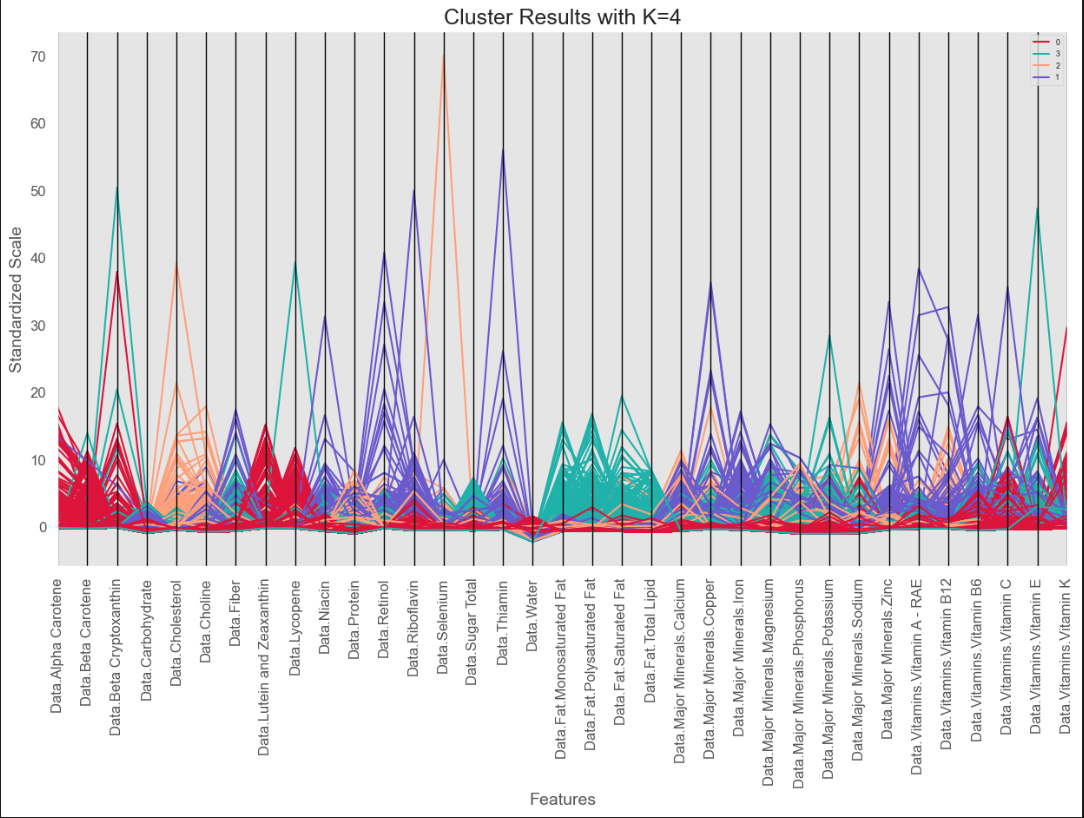

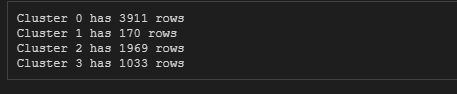

Looking at our above graph, we can see 4 different clusters determined by our K-means algorithm and how their values are distributed across different features.

Looking at cluster 0 (Red): High in Alpha Carotene, Beta Carotene, Zeaxanthin, Lycopene, Water, Vitamin C, and Vitamin K. When analyzing this cluster, we see the features that are high in values are features that related to color of a food, vitamin content, and water. This leads us to believe that this cluster is representative of fruits and vegetables. This cluster also has 3911 items within it so we considered the possibility of this cluster containing foods outside of the fruits/vegetables category that may happen to be high in some of these features, although upon inspecting our graph above, we don't see much spread within this cluster (all of the datapoints within this cluster are somewhat close together), and so believe that this category captures all fruits/vegetables and other foods for which fruits or vegetables are the primary ingredient. This could go to show that foods/dishes that use fruits/vegetables as a primary ingredient could be an adequate susbstitute for directly eating one of these fruits/vegetables.

Looking at cluster 1 (Purple): High in Fiber, Retinol, Riboflavin, Thiamin, Calcium, Iron, Protein, Zinc, and Vitamin B12. When analysing this cluster and the features for which this cluster has high values, we believe this cluster primarily represents foods such as meats, beans, dairy. Although it is surprising to us that there are only 170 foods contained within this cluster. This may be happening because many of the meats and dairy products are high in fats and so they get clustered into one of the other clusters representing fatty foods, whereas this small cluster represents the healthier foods within the meats/protein/beans category. This could go to show that many less healthy meats or dairy products can be so unhealthy that they are better categorized with other fatty foods rather than healthy meats.

Looking at cluster 2 (Peach): High in Cholesterol, Protein, Sodium, Zinc, Vitamin B12. When analyzing this cluster, we suspect that this cluster represents foods like eggs or foods that are deep-fried (due to high sodium and cholesterol) or unhealthy meats. Many of the meats which aren't in cluster 1 due to their unhealthy nature may be within this cluster. This cluster contains 1969 foods, which isn't surprisingly low or surprisingly high. There is not much insight to be gained from this observed cluster other than the fact that deep-fried foods may be in the same cluster as unhealthy meats which goes to show that unhealthy meats may be comparable in some aspects to deep-fried foods which are known for being extremely unhealthy. This makes less healthy meats far less attractive as a component of our everyday lifestyles.

Looking at cluster 3 (Turqoise): High in Monosaturated Fat, Polysaturated Fat, Saturated Fat, Sugar, Lipid, Magnesium. When analyzing this cluster, we suspect that it consists mainly of foods with high amounts of oil (both healthy and unhealthy oils) and of junk foods that are high in sugar (such as cake, chocolate, and icecream). It is also hard to claim any specific new insights from this cluster, although it is worth noting that 1033 foods from the dataset fall into this cluster, which is a significant portion of our dataset (about a seventh of the total datapoints) considering that this cluster primarily represents just oily and fatty foods. This could be due to a bias in our data having a lot of fatty/oily foods, or it could be due to the possibility that we underestimate how many foods can be considered fatty or oily.  

## Conclusions

#### Summary of Findings & Translation to Real World

Based on our findings from our K-means clustering results in the prior section, we can begin to condense our findings. 

To start, when looking at our K-means clustering operation using 9 clusters (K=9), we saw that while some of our clusters gave us insightful results (ex. Clusters for healthy fat foods), other clusters gave unhelpful results (ex. Clusters for red-colored foods). This goes to show that when dealing with many features, some features may affect results in unwanted ways and reduce the effect of other more important features in our final results. Also, even though we used the optimal value for K (Knee point value from SSE vs. K-Value graph), having 9 clusters made it hard to understand each cluster's representation. Each of the 9 clusters represented some combination of the 35 features, and this combination wasn’t always easy to interpret as a general category/group of foods. Overall, using K-means with K=9 wasn’t very insightful for finding business insights into nutritional relationships between foods. Although we did learn about the challenges of using a larger K-value in K-means clustering and how having many features (35 in our case) can make it harder to interpret business insights.

When looking at our K-means clustering operation using 2 clusters (K=2), we saw that our dataset was split into two clusters with one cluster containing about 90% of the data points and the other cluster containing about 10%. Also upon analyzing the clusters, there were no apparent nutritional insights from the data points in each cluster. Furthermore, we notice that the distance between data points within the smaller cluster (containing only 10% of data points) was very large. All these three items led us to believe that this K-means operation using K=2 just created a cluster for foods extremely dissimilar to all other foods (cluster with 10% of data points and large distance between data points) and a cluster for all the remaining foods. We originally expected that using K-means with K=2 on our dataset would lead to the categorization of healthy and unhealthy foods, although this is not what happened. This doesn’t mean our results weren’t insightful though, because our clustering result provided us with a cluster of foods that are very dissimilar to most other foods and are also not very similar to other foods within their own cluster. These foods may be worth analyzing more within the scientific community for the very specific attributes that separate them from all other foods. So in summary, using K=2 on our dataset did give us some interesting business insights which could spark further scientific analysis, although it did not give us the insights we expected (healthy vs. unhealthy foods).

Finally, when looking at our K-means clustering operation using 4 clusters (K=4), we obtain some interesting results within our clustering which could spark further research/questioning. One of the insights we saw is that meats appeared in two clusters with one of those clusterings having 170 items and the other cluster having 1969 items - we believe the first (smaller) cluster represented healthier meats while the second (larger) cluster represented less healthy foods (specifically deep-fried foods). This led us to consider the possibility that only a small portion of meats can actually be considered “healthy”, and those that are less healthy are comparable to other deep-fried foods which are notoriously unhealthy. In general, this makes processed meats and other less healthy meats seem like a significant detriment to the average person’s diet. Another insight we saw is that our largest cluster which contained 3911 items had high values in features that relate to fruits and vegetables, which at first seemed weird because there were not 3911 items in our dataset (more than 50% of data points) which were fruits/vegetables. Although we realized that this is happening because foods/dishes that contain fruits/vegetables may be included in this cluster. This led to the insight that foods/dishes which contain fruits/vegetables may carry the same nutritional benefits as plain fruits/vegetables. This insight may require further research although if it is true it could be very encouraging for people who dislike eating fruits/vegetables but don’t mind consuming them in conjunction with other foods. Our third significant insight from our clustering results was that one of our clusters which had approximately a seventh of all our data points was just a cluster of fatty and oily foods. This was interesting because we generally expect that less than a seventh of foods are classified as very fatty/oily foods. This could be due to either a bias in our data towards unhealthy foods or due to the possibility that we underestimate how many foods in the real world are considered fatty/oily. This could be more of a subjective insight depending on one’s expectations for how many foods in the real world are healthy or unhealthy, nonetheless, it was something that was thought-provoking for us while analyzing this cluster’s results. Originally we expected that using 4 means with K-means clustering on our data would lead to foods being categorized by their food group (dairy, grain, protein, fruit/vegetable), although that is not exactly what happened here. Still, the insights we did gain from using 4 means were thought-provoking and have given us questions that we can use to pursue further research.

Also based on our findings, it is evident that food categorization in the real world is not done based on the nutritional facts of individual foods, but rather it is done based on the sources/ingredients of the individual foods. This leads to the common categorizations such as meats, dairy, grain, and fruits/vegetables, which could have a wide spread of nutritional facts across foods within their individual categories. For example, we saw in our clustering results how meats were divided into two separate clusters of healthy/unhealthy meats because there can be so much variance in the nutritional value of foods within the meat category. 
This goes to show that the general categorizations we use in the real world can create false assumptions regarding nutritional value. Another example, both cheese, and milk are members of the dairy food group and are excellent sources of calcium. However, if someone were to ignore the nutritional facts of these two items, they would fail to realize that while cheese is a source of calcium, it also contains much fatter than milk does. So we need to pay attention to specific details of the individual foods we eat, rather than generalize and assume nutritional information.


#### Learnings about Machine Learning

One of the most important things we learned while completing this project is that machine learning projects are not as code-heavy as they are theory-heavy. Tools and libraries are readily available and the amount of time it takes to code is negligible compared to the time it takes to apply the theory to our specific dataset and problem statement. For example, in order to perform PCA we needed to understand that decreasing the number of components affected the amount of variance retained within the dataset. As such, we knew we needed to plot a variance curve and output the number of dimensions that would retain the variance percentage we were targeting. The theory determined the individual code blocks we needed to write. 

Another learning we gained while working on this project is that, when using a very small amount of clusters, it is very easy to have clusters affected significantly by outlier data points due to the fact that there are fewer means that can be spread out to reduce the distances.

One more learning we gained while working on this project is that we can do nested clustering. Meaning we can take a resulting cluster and perform K-means clustering further on that cluster to obtain more specific results. We realized we could do this technique after our results from clustering with 2 means left us with a cluster of “outlier” data points and a cluster with all the remaining data (non-outlier data). We could do further clustering on the “non-outlier” cluster although in our case we were already satisfied with the results/insights gained. 

Furthermore, we learned that sometimes when clustering we may get clusters that contain too few or too many data points. What constitutes “too much” or “too few” may be subjective although putting some kind of limits/bounds may help avoid situations like our clustering results from using 9 means where one cluster had only 4 items while another cluster had 3390 items. 

Another very important learning from this project was that simply using more features isn’t always beneficial depending on the results you’re looking for. Some features may be extremely relevant to your specific clustering goals and other features may not be, so if all these features are used, it is possible for less relevant features to alter results and hinder the effect of more relevant features. This can lead to less desirable clustering results. We realized this after seeing some of our food clusters primarily clustered based on color (Note: we didn’t want to entirely remove those features relating to color because those features could also relate to other nutritional information which we would still want).

We also gained important learning relating to how we analyze clusters. Specifically, we learned how it can be beneficial to also look at the distance between data points within a cluster rather than just looking at which data points are in a cluster. Looking at the distance can tell us about the relationships between items within a cluster. We learned this after clustering using 2 means and seeing a large distance between the small amount of data points within one of our clusters, which led us to believe that that cluster consisted of unique foods that have special nutritional attributes dissimilar to all other foods (including foods within their own cluster).

These are some of our most important learnings from working on this project. Note, we didn’t implement some of these learnings because we already were satisfied with our results and the business insights obtained and because implementing all these learnings would drastically increase the scope of the project by ‘X’ fold due to the repetitive/exponential nature of these learned techniques.


#### Suggestions for Continuing Project

Even though we obtained results and insights we are satisfied with, we have suggestions for steps that could be taken to improve this machine learning project and possibly obtain new insights. 

Our first suggestion would be to redo clustering but with different features removed from the dataset. Specifically, certain features can be removed if they don’t relate to the specific target results. This can help with obtaining focused clustering results so that unimportant features don’t create noise in results.

Our next suggestion would be to perform more iterations of K-means clustering with different K-values. This will provide more clustering results which can be analyzed for new insights.

Another suggestion we have is to perform nested clustering, meaning performing further K-means clustering on a resulting cluster from a previous K-means clustering operation. This can help find depth/hierarchies within the categorizations of foods, which can lead to very interesting new insights.

One other suggestion we have is to somehow create limits on the sizes of generated clusters so that they must have some minimum/maximum size. If this can be implemented, it could lead to interesting opportunities for parameter tuning to obtain different results/insights.


## Bibliography


1. Whitcomb, R., Choi, J. M., &amp; Guan, B. (2021, October 15). Food CSV file. CORGIS Datasets Project. Retrieved March 24, 2023, from https://corgis-edu.github.io/corgis/csv/food/

2. Khan, U. M., Sevindik, M., Zarrabi, A., Nami, M., Ozdemir, B., Kaplan, D. N., Selamoglu, Z., Hasan, M., Kumar, M., Alshehri, M. M., &amp; Sharifi-Rad, J. (2021, November 19). Lycopene: Food sources, biological activities, and human health benefits. Oxidative medicine and cellular longevity. Retrieved March 24, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8626194/#:~:text=Red%20fruits%20and%20vegetables%20such,are%20important%20sources%20of%20lycopene.

3. Rousseau, N. (2017, February 17). Alpha-carotene or the secret to longevity: Louis Bonduelle Foundation. Fondation Louis Bonduelle. Retrieved March 24, 2023, from https://www.fondation-louisbonduelle.org/en/2016/10/13/alpha-carotene-or-the-secret-to-longevity/#:~:text=So%20add%20color%20to%20your,%2C%20cabbage%2C%20and%20green%20salad.

4. BJ;, B. (n.d.). Beta-cryptoxanthin as a source of vitamin A. Journal of the science of food and agriculture. Retrieved March 24, 2023, from https://pubmed.ncbi.nlm.nih.gov/25270992/#:~:text=Foods%20that%20are%20rich%20in,cell%2Dto%2Dcell%20communication.

5. Kaputk. (2021, November 17). 5 high-cholesterol foods to avoid - and which ones you should eat. Cleveland Clinic. Retrieved March 24, 2023, from https://health.clevelandclinic.org/high-cholesterol-foods-to-eat-and-avoid/

6. Beta-carotene. Mount Sinai Health System. (n.d.). Retrieved March 24, 2023, from https://www.mountsinai.org/health-library/supplement/beta-carotene#:~:text=The%20richest%20sources%20of%20beta,more%20beta%2Dcarotene%20it%20has.

7. Manetti, S. (2022, June 22). Facts about monounsaturated fats: Medlineplus medical encyclopedia. MedlinePlus. Retrieved March 24, 2023, from https://medlineplus.gov/ency/patientinstructions/000785.htm

8. Spritzler, F. (2020, January 27). 12 healthy foods that are high in iron. Healthline. Retrieved March 24, 2023, from https://www.healthline.com/nutrition/healthy-iron-rich-foods#5.-Red-meat

9. Abdel-Aal, E.-S. M., Akhtar, H., Zaheer, K., &amp; Ali, R. (2013, April 9). Dietary sources of lutein and zeaxanthin carotenoids and their role in Eye Health. Nutrients. Retrieved March 24, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3705341/

10. NHS. (2020, August 3). Vitamin A -Vitamins and minerals. NHS choices. Retrieved March 24, 2023, from https://www.nhs.uk/conditions/vitamins-and-minerals/vitamin-a/

11. Food and drinks high in fat, salt and sugar. Tameside Metropolitan Borough Council. (n.d.). Retrieved March 24, 2023, from https://www.tameside.gov.uk/SocialCareServices/Healthy-Eating-and-Nutrition/Get-in-the-know/Food-and-drinks-high-in-fat,-salt-and-sugar#:~:text=Chocolate%2C%20cakes%2C%20biscuits%2C%20full,small%20amounts%20and%20less%20often.

12. Whitbread, D. (2023, March 20). Top 10 foods highest in lycopene. myfooddata. Retrieved March 24, 2023, from https://www.myfooddata.com/articles/high-lycopene-foods.php

13. 
